<a href="https://colab.research.google.com/github/lmcanavals/cs_topics/blob/main/0403_coloring_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from random import *

In [ ]:
def generarGrafoAleatorio(n,m):
  g = [[] for _ in range(n)]
  for i in range(m):#para la cantidad de aristas
    v1 = randint(0,n-1)#elegir aleatoriamente el vertice 1
    v2 = randint(0,n-1)#elegir aleatoriamente el vertice 2
    #evitar repetir aristas
    while v1 == v2 or v2 in g[v1]: #si se detecta que v1==2 o v2 ya es vecino de v1
      v1 = randint(0,n-1)
      v2 = randint(0,n-1)
    g[v1] += [v2] #g[v1].append(v2) #agregar el v2 al vecindario del v1
    g[v2] += [v1] #g[v2].append(v1) #agregar el v1 al vecindario del v2
  return g

generarGrafoAleatorio(10,30)

[[6, 4, 3, 5, 8],
 [8, 6, 4, 9, 5],
 [6, 5, 3],
 [0, 7, 6, 2, 4, 5, 9],
 [0, 6, 1, 9, 3, 8, 5],
 [0, 2, 3, 9, 8, 1, 7, 4],
 [0, 1, 4, 9, 8, 7, 2, 3],
 [3, 6, 8, 5],
 [9, 1, 6, 0, 7, 4, 5],
 [8, 6, 4, 1, 3, 5]]

[[11, 16, 4, 3, 18, 5, 17], [14, 6, 8], [15, 10, 4, 18, 12, 9], [10, 4, 5, 0, 14, 8], [15, 14, 12, 3, 2, 0, 19], [15, 10, 3, 0, 11], [13, 1, 10], [19, 11, 10], [14, 1, 3], [2], [2, 5, 3, 11, 6, 7], [0, 12, 10, 7, 5], [11, 4, 18, 15, 2, 16], [6], [1, 4, 8, 3], [4, 2, 5, 19, 12], [0, 12], [0], [12, 2, 0], [15, 7, 4]]


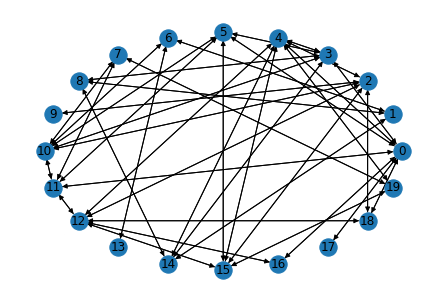

In [ ]:
import networkx as nx

n = 20
m = 40
#generar grafo como lista de listas
grafo = generarGrafoAleatorio(n,m)
print(grafo)
#crear grafo
G = nx.DiGraph()
#agregar nodos
for u in range(len(grafo)):
  G.add_node(u)
#agregar aristas
for u in range(len(grafo)):
  for v in grafo[u]:
    G.add_edge(u,v)
#plotear grafo con disposición circular
nx.draw_circular(G, with_labels=True)

In [ ]:
!pip install ortools

     |████████████████████████████████| 14.4 MB 91 kB/s 


In [ ]:
from ortools.sat.python import cp_model

#crear CSP
model = cp_model.CpModel()
#variables y dominios
color = [model.NewIntVar(1,n,'color_nodo_'+str(i)) for i in range(n)]
print(color)
#restricciones
for u in range(len(grafo)):
  for v in grafo[u]:
    model.Add(color[u] != color[v])

[color_nodo_0(1..20), color_nodo_1(1..20), color_nodo_2(1..20), color_nodo_3(1..20), color_nodo_4(1..20), color_nodo_5(1..20), color_nodo_6(1..20), color_nodo_7(1..20), color_nodo_8(1..20), color_nodo_9(1..20), color_nodo_10(1..20), color_nodo_11(1..20), color_nodo_12(1..20), color_nodo_13(1..20), color_nodo_14(1..20), color_nodo_15(1..20), color_nodo_16(1..20), color_nodo_17(1..20), color_nodo_18(1..20), color_nodo_19(1..20)]


In [ ]:
#crear solver
solver = cp_model.CpSolver()
status = solver.Solve(model)

c = [] #lista de colores asignados a los nodos
if status == cp_model.OPTIMAL:
  for u in range(len(grafo)):
    print("Nodo",u,'de color',solver.Value(color[u]))
    c += [solver.Value(color[u])]

Nodo 0 de color 7
Nodo 1 de color 3
Nodo 2 de color 9
Nodo 3 de color 2
Nodo 4 de color 1
Nodo 5 de color 8
Nodo 6 de color 2
Nodo 7 de color 1
Nodo 8 de color 4
Nodo 9 de color 1
Nodo 10 de color 3
Nodo 11 de color 4
Nodo 12 de color 5
Nodo 13 de color 1
Nodo 14 de color 5
Nodo 15 de color 6
Nodo 16 de color 6
Nodo 17 de color 8
Nodo 18 de color 8
Nodo 19 de color 7


[(0.1011575125864298, 0.8641612068641013, 0.8861303176145564), (0.2591278476313301, 0.583307188737869, 0.9155243838062276), (0.6963359838809008, 0.28054087903377145, 0.9449993465820965), (0.8649390333533052, 0.12336025016757457, 0.2631823042940177), (0.39194104140549224, 0.16723903264350115, 0.6315851795997747), (0.32639970714556055, 0.3129621831773822, 0.31803389025048034), (0.6405368654076844, 0.21869625355638678, 0.3225006291217648), (0.495583791793788, 0.9138623849779369, 0.5793529056049243), (0.3199021924564396, 0.7196400155034075, 0.38695869626927604), (0.7635196334485668, 0.8276516641262771, 0.8072780583619157), (0.5323491031876277, 0.43448907629003963, 0.6224734095229589), (0.2930694360656535, 0.7228666718553253, 0.5536397146191318), (0.7655606914843922, 0.34841373032501, 0.9151342351303067), (0.359341596377862, 0.1090492306331099, 0.03359171582499343), (0.9824569401240177, 0.44743055292521006, 0.8790436548490731), (0.13066469039996242, 0.033985344092618885, 0.3695122395063397)

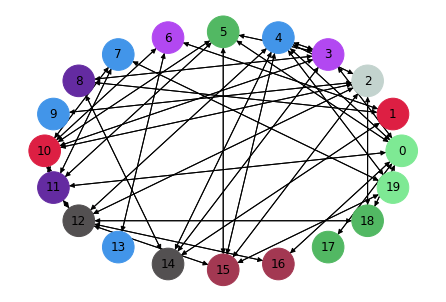

In [ ]:
colors = [(random(),random(),random()) for i in range(n)]
print(colors)

G1 = nx.DiGraph()
for u in range(len(grafo)):
  G1.add_node(u)
for u in range(len(grafo)):
  for v in grafo[u]:
    G1.add_edge(u,v)

nx.draw_circular(G1, with_labels=True, node_color=[colors[x] for x in c], node_size=1000)

[[16, 27, 21, 44, 13, 36, 43, 38, 40], [28, 33, 15, 37, 20, 35], [19, 33, 31, 44, 18], [28, 22, 20, 21, 49, 25, 39, 19, 37], [19, 8, 43, 23, 41, 48, 18, 16, 31, 33, 36, 39], [12, 32, 28, 24, 10, 13, 29, 16, 22, 45], [29, 38, 20, 36, 45, 41], [11, 36, 25, 24, 30, 26], [4, 26, 23, 47, 20, 32, 40, 27, 31], [26, 48, 20, 19], [36, 34, 5, 48, 18, 29], [7, 44, 43, 24, 42, 27], [42, 15, 43, 37, 5, 35, 28, 34, 49, 20, 25, 21], [25, 46, 41, 45, 5, 0, 28, 30], [31, 24, 26, 17], [12, 1, 26, 36, 34, 47, 16, 21], [0, 40, 33, 32, 36, 4, 43, 5, 38, 15], [25, 44, 38, 37, 14, 21], [27, 47, 4, 43, 23, 2, 45, 40, 31, 10, 34], [4, 34, 2, 24, 36, 9, 3], [39, 1, 3, 9, 8, 12, 6, 37], [29, 26, 0, 3, 43, 25, 12, 23, 46, 15, 17], [3, 5, 43, 29], [28, 4, 34, 8, 18, 30, 35, 21], [38, 25, 35, 7, 14, 19, 11, 5], [17, 13, 48, 24, 7, 3, 12, 32, 21], [9, 21, 8, 38, 15, 14, 43, 7, 36], [18, 33, 0, 43, 11, 32, 49, 8], [1, 30, 3, 23, 12, 5, 32, 40, 13], [21, 6, 36, 34, 5, 44, 22, 47, 31, 10, 33], [28, 49, 7, 23, 13], [14,

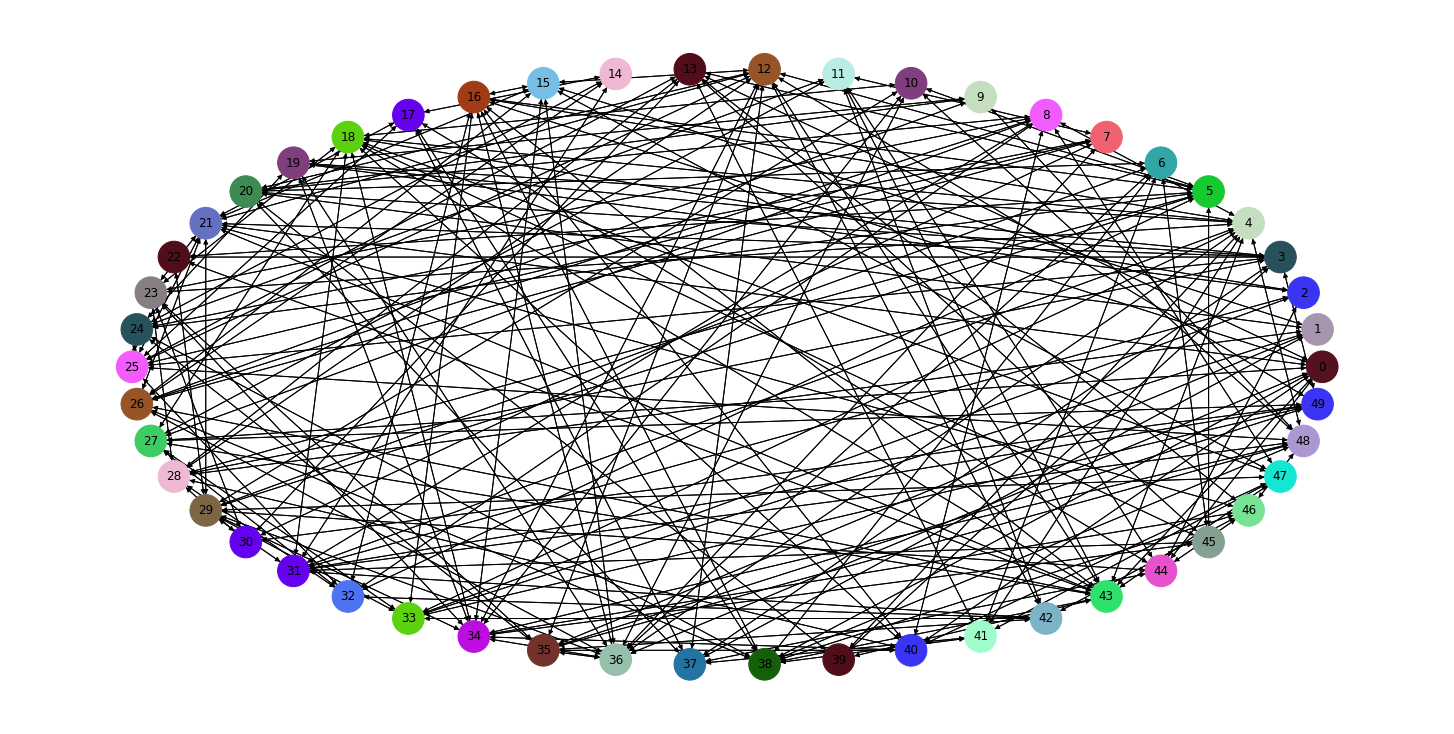

In [ ]:
import matplotlib.pyplot as plt

n = 50
m = 200
#generar grafo como lista de listas
grafo = generarGrafoAleatorio(n,m)
print(grafo)
#crear grafo
G = nx.DiGraph()
#agregar nodos
for u in range(len(grafo)):
  G.add_node(u)
#agregar aristas
for u in range(len(grafo)):
  for v in grafo[u]:
    G.add_edge(u,v)

#crear CSP
model = cp_model.CpModel()
#variables y dominios
color = [model.NewIntVar(1,n,'color_nodo_'+str(i)) for i in range(n)]
print(color)
#restricciones
for u in range(len(grafo)):
  for v in grafo[u]:
    model.Add(color[u] != color[v])
#crear solver
solver = cp_model.CpSolver()
status = solver.Solve(model)

c = [] #lista de colores asignados a los nodos
if status == cp_model.OPTIMAL:
  for u in range(len(grafo)):
    #print("Nodo",u,'de color',solver.Value(color[u]))
    c += [solver.Value(color[u])]

colors = [(random(),random(),random()) for i in range(n)]
print(colors)

G1 = nx.DiGraph()
for u in range(len(grafo)):
  G1.add_node(u)
for u in range(len(grafo)):
  for v in grafo[u]:
    G1.add_edge(u,v)

plt.figure(figsize=(20,10))
nx.draw_circular(G1, with_labels=True, node_color=[colors[x] for x in c], node_size=1000)

In [ ]:
!pip install geopandas

     |████████████████████████████████| 994 kB 5.3 MB/s 
     |████████████████████████████████| 6.3 MB 30.3 MB/s 
     |████████████████████████████████| 15.4 MB 37 kB/s 


In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np

In [ ]:
url_data = 'https://raw.githubusercontent.com/juaneladio/peru-geojson/master/peru_departamental_simple.geojson'

In [ ]:
region_geojson = gpd.read_file(url_data)
region_geojson.head()

,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry
0,AMAZONAS,84,01,3930646.567,"POLYGON ((-77.75893 -6.96451, -77.84586 -6.976..."
1,ANCASH,166,02,3596224.600,"POLYGON ((-77.31749 -8.53015, -77.28903 -8.589..."
2,APURIMAC,80,03,2111415.170,"POLYGON ((-72.47177 -14.66140, -72.57725 -14.6..."
3,AREQUIPA,109,04,6325588.935,"POLYGON ((-75.07333 -15.44294, -75.04965 -15.4..."
4,AYACUCHO,111,05,4350381.783,"POLYGON ((-74.34595 -12.17374, -74.32187 -12.2..."


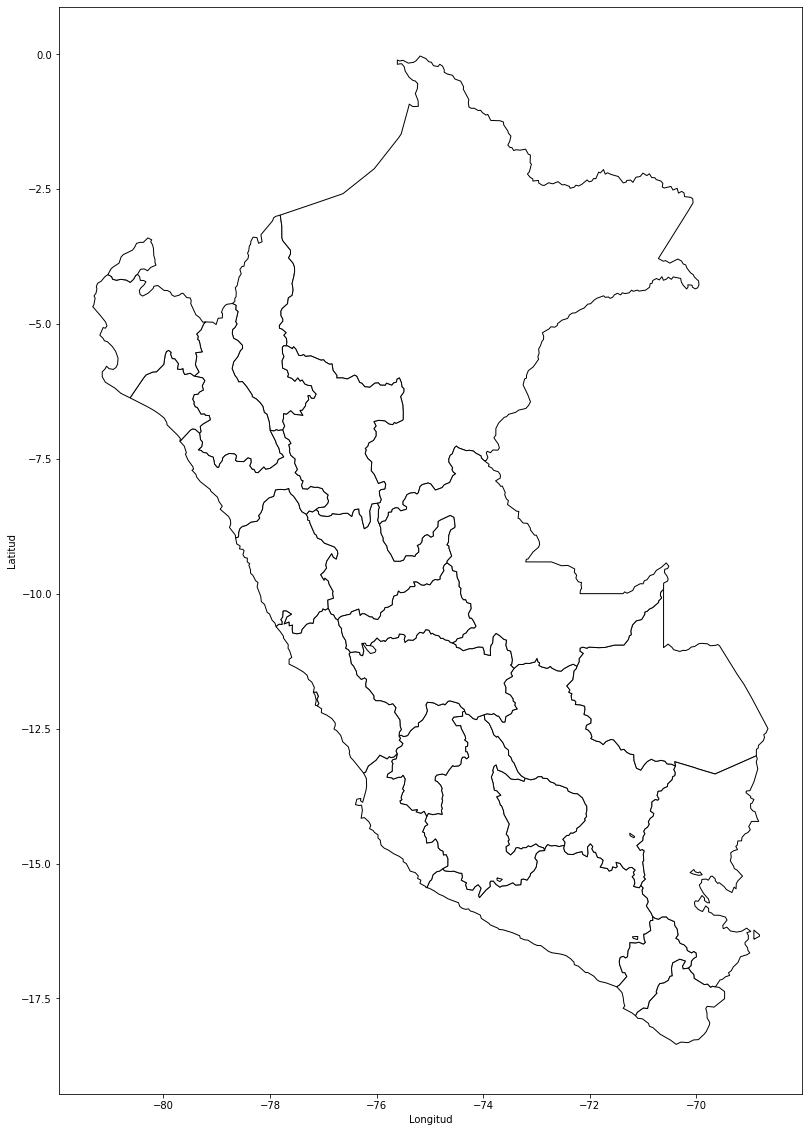

In [ ]:
from matplotlib.colors import ListedColormap

#lista de 25 colores en blanco
cmap = ListedColormap(['white' for _ in range(25)],name='test')

#plotear la figura con esa lista y lineas de color negro
region_geojson.plot(figsize=(20,20),edgecolor='black',cmap=cmap)
#etiquetas de la figura
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

In [ ]:
regiones = list(region_geojson['NOMBDEP'].values)
print(regiones)

['AMAZONAS', 'ANCASH', 'APURIMAC', 'AREQUIPA', 'AYACUCHO', 'CAJAMARCA', 'CALLAO', 'CUSCO', 'HUANCAVELICA', 'HUANUCO', 'ICA', 'JUNIN', 'LA LIBERTAD', 'LAMBAYEQUE', 'LIMA', 'LORETO', 'MADRE DE DIOS', 'MOQUEGUA', 'PASCO', 'PIURA', 'PUNO', 'SAN MARTIN', 'TACNA', 'TUMBES', 'UCAYALI']


In [ ]:
grafo_regional = [[15,21,12,5],[12,9,14],[7,3,4],
                  [17,20,7,2,4,10],[11,8,10,7,2,3],[19,13,12,0],
                  [14],[24,16,20,3,2,4,11],[10,14,11,4,3],
                  [1,12,21,24,18,14,15],[14,8,4,3],[14,18,24,7,4,8],
                  [13,5,0,21,9,1],[19,5,12],[1,9,18,11,8,10,6],
                  [0,21,24,9],[24,20,7],[3,20,22],
                  [9,14,24,11],[23,13,5],[7,16,17,22,3],
                  [0,15,24,9,1,12],[17,20],[19],[15,9,18,11,7,16]]
for u in range(len(grafo_regional)):
  print(regiones[u],[regiones[v] for v in grafo_regional[u]])

AMAZONAS ['LORETO', 'SAN MARTIN', 'LA LIBERTAD', 'CAJAMARCA']
ANCASH ['LA LIBERTAD', 'HUANUCO', 'LIMA']
APURIMAC ['CUSCO', 'AREQUIPA', 'AYACUCHO']
AREQUIPA ['MOQUEGUA', 'PUNO', 'CUSCO', 'APURIMAC', 'AYACUCHO', 'ICA']
AYACUCHO ['JUNIN', 'HUANCAVELICA', 'ICA', 'CUSCO', 'APURIMAC', 'AREQUIPA']
CAJAMARCA ['PIURA', 'LAMBAYEQUE', 'LA LIBERTAD', 'AMAZONAS']
CALLAO ['LIMA']
CUSCO ['UCAYALI', 'MADRE DE DIOS', 'PUNO', 'AREQUIPA', 'APURIMAC', 'AYACUCHO', 'JUNIN']
HUANCAVELICA ['ICA', 'LIMA', 'JUNIN', 'AYACUCHO', 'AREQUIPA']
HUANUCO ['ANCASH', 'LA LIBERTAD', 'SAN MARTIN', 'UCAYALI', 'PASCO', 'LIMA', 'LORETO']
ICA ['LIMA', 'HUANCAVELICA', 'AYACUCHO', 'AREQUIPA']
JUNIN ['LIMA', 'PASCO', 'UCAYALI', 'CUSCO', 'AYACUCHO', 'HUANCAVELICA']
LA LIBERTAD ['LAMBAYEQUE', 'CAJAMARCA', 'AMAZONAS', 'SAN MARTIN', 'HUANUCO', 'ANCASH']
LAMBAYEQUE ['PIURA', 'CAJAMARCA', 'LA LIBERTAD']
LIMA ['ANCASH', 'HUANUCO', 'PASCO', 'JUNIN', 'HUANCAVELICA', 'ICA', 'CALLAO']
LORETO ['AMAZONAS', 'SAN MARTIN', 'UCAYALI', 'HUANUCO']


In [ ]:
#crear CSP
model = cp_model.CpModel()
#variables y dominios
color = [model.NewIntVar(1,25,'color_region_'+str(i)) for i in range(25)]
#restricciones
for u in range(len(grafo_regional)):
  for v in grafo_regional[u]:
    model.Add(color[u] != color[v])

In [ ]:
#crear solver
solver = cp_model.CpSolver()
status = solver.Solve(model)

c = []
if status == cp_model.OPTIMAL:
  for u in range(len(grafo_regional)):
    print('Region',u,'(',regiones[u],')','de color',solver.Value(color[u]))
    c += [solver.Value(color[u])]

Region 0 ( AMAZONAS ) de color 15
Region 1 ( ANCASH ) de color 3
Region 2 ( APURIMAC ) de color 3
Region 3 ( AREQUIPA ) de color 5
Region 4 ( AYACUCHO ) de color 1
Region 5 ( CAJAMARCA ) de color 1
Region 6 ( CALLAO ) de color 1
Region 7 ( CUSCO ) de color 2
Region 8 ( HUANCAVELICA ) de color 7
Region 9 ( HUANUCO ) de color 12
Region 10 ( ICA ) de color 6
Region 11 ( JUNIN ) de color 10
Region 12 ( LA LIBERTAD ) de color 2
Region 13 ( LAMBAYEQUE ) de color 3
Region 14 ( LIMA ) de color 8
Region 15 ( LORETO ) de color 13
Region 16 ( MADRE DE DIOS ) de color 3
Region 17 ( MOQUEGUA ) de color 1
Region 18 ( PASCO ) de color 9
Region 19 ( PIURA ) de color 4
Region 20 ( PUNO ) de color 4
Region 21 ( SAN MARTIN ) de color 14
Region 22 ( TACNA ) de color 5
Region 23 ( TUMBES ) de color 5
Region 24 ( UCAYALI ) de color 11


Hay 25 regiones con colores: [15, 3, 3, 5, 1, 1, 1, 2, 7, 12, 6, 10, 2, 3, 8, 13, 3, 1, 9, 4, 4, 14, 5, 5, 11]
Hay 15 colores únicos: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}


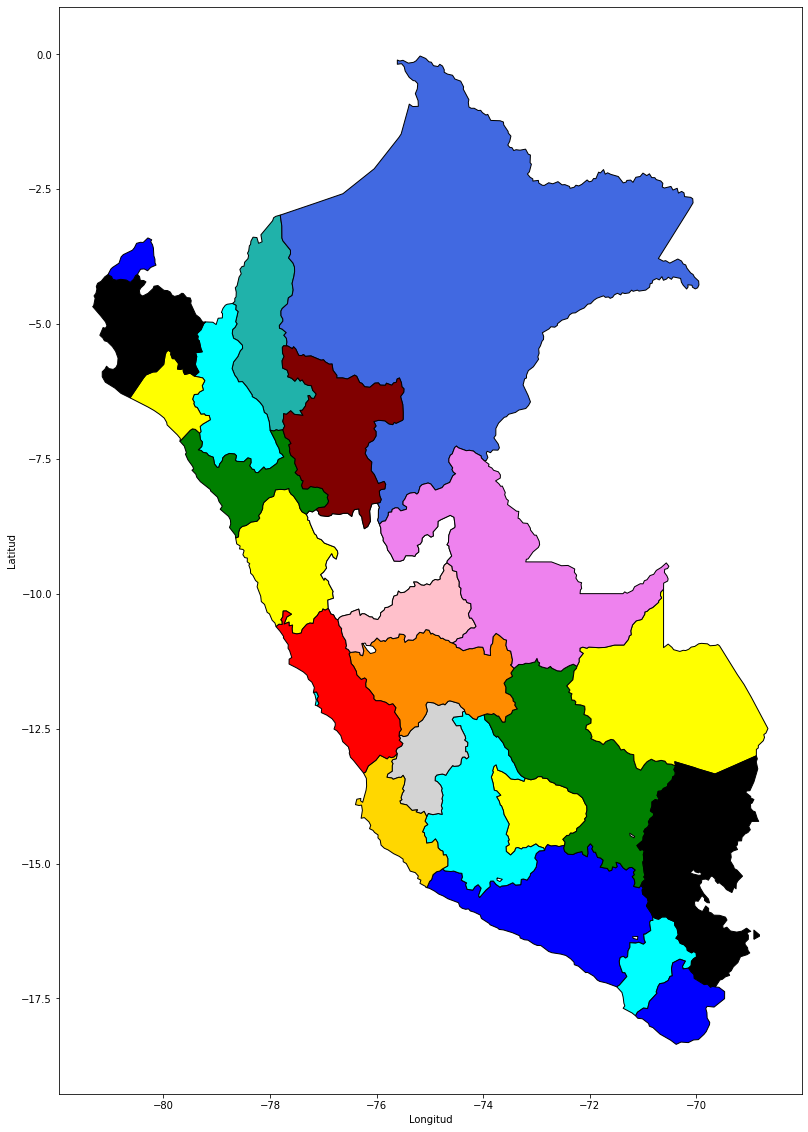

In [ ]:
#imprimir cantidad de colores
print('Hay',len(c),'regiones con colores:',c)
print('Hay',len(set(c)),'colores únicos:',set(c))
#plotear
colors_regiones = ['','cyan','green','yellow','black',
                   'blue','gold','lightgray','red',
                   'pink','darkorange','violet','white',
                   'royalblue','maroon','lightseagreen']

cmap = ListedColormap([colors_regiones[c[i]] for i in range(25)],name='regions')
region_geojson.plot(figsize=(20,20),edgecolor='black',cmap=cmap)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

In [ ]:
#crear CSP
model = cp_model.CpModel()
#variables y dominios
#color = [model.NewIntVar(1,25,'color_region_'+str(i)) for i in range(25)]

nc = []
for i in range(25):
  fila = []
  for j in range(25):
    fila += [model.NewBoolVar('color_'+str(i)+'_'+str(j))]
  nc += [fila]
print(nc)

usocolor = []
for j in range(25):
  usocolor += [model.NewBoolVar('usocolor'+str(j))]
  col = [nc[i][j] for i in range(25)]
  model.Add(sum(col) > 0).OnlyEnforceIf(usocolor[j])
  model.Add(sum(col) == 0).OnlyEnforceIf(usocolor[j].Not())

numerocolores = model.NewIntVar(1,25,'numerocolores')
model.Add(sum(usocolor) == numerocolores)

color = []
for i in range(25):
  color += [model.NewIntVar(1,25,'color_region_'+str(i))]
  for j in range(25):
    model.Add(color[i] == j+1).OnlyEnforceIf(nc[i][j])
    model.Add(color[i] != j+1).OnlyEnforceIf(nc[i][j].Not())

#restricciones
for u in range(len(grafo_regional)):
  for v in grafo_regional[u]:
    model.Add(color[u] != color[v])

#función objetivo
model.Minimize(numerocolores)

[[color_0_0(0..1), color_0_1(0..1), color_0_2(0..1), color_0_3(0..1), color_0_4(0..1), color_0_5(0..1), color_0_6(0..1), color_0_7(0..1), color_0_8(0..1), color_0_9(0..1), color_0_10(0..1), color_0_11(0..1), color_0_12(0..1), color_0_13(0..1), color_0_14(0..1), color_0_15(0..1), color_0_16(0..1), color_0_17(0..1), color_0_18(0..1), color_0_19(0..1), color_0_20(0..1), color_0_21(0..1), color_0_22(0..1), color_0_23(0..1), color_0_24(0..1)], [color_1_0(0..1), color_1_1(0..1), color_1_2(0..1), color_1_3(0..1), color_1_4(0..1), color_1_5(0..1), color_1_6(0..1), color_1_7(0..1), color_1_8(0..1), color_1_9(0..1), color_1_10(0..1), color_1_11(0..1), color_1_12(0..1), color_1_13(0..1), color_1_14(0..1), color_1_15(0..1), color_1_16(0..1), color_1_17(0..1), color_1_18(0..1), color_1_19(0..1), color_1_20(0..1), color_1_21(0..1), color_1_22(0..1), color_1_23(0..1), color_1_24(0..1)], [color_2_0(0..1), color_2_1(0..1), color_2_2(0..1), color_2_3(0..1), color_2_4(0..1), color_2_5(0..1), color_2_6(0.

In [ ]:
#crear solver
solver = cp_model.CpSolver()
status = solver.Solve(model)

c = []
if status == cp_model.OPTIMAL:
  print("El número de colores es",solver.Value(numerocolores))
  for i in range(len(grafo_regional)):
    for j in range(len(grafo_regional)):
      print(solver.Value(nc[i][j]),end=' ')
    print()
  print()
  for i in range(len(grafo_regional)):
    print(solver.Value(usocolor[i]),end=' ')
  print()
  for u in range(len(grafo_regional)):
    print('Region',u,'(',regiones[u],')','de color',solver.Value(color[u]))
    c += [solver.Value(color[u])]

El número de colores es 4
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 
0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 
0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 
0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 
0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 
0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 
0 0 0

Hay 25 regiones con colores: [17, 2, 20, 17, 21, 20, 17, 2, 2, 17, 20, 17, 21, 2, 21, 2, 17, 2, 20, 21, 20, 20, 21, 20, 21]
Hay 4 colores únicos: {17, 2, 20, 21}


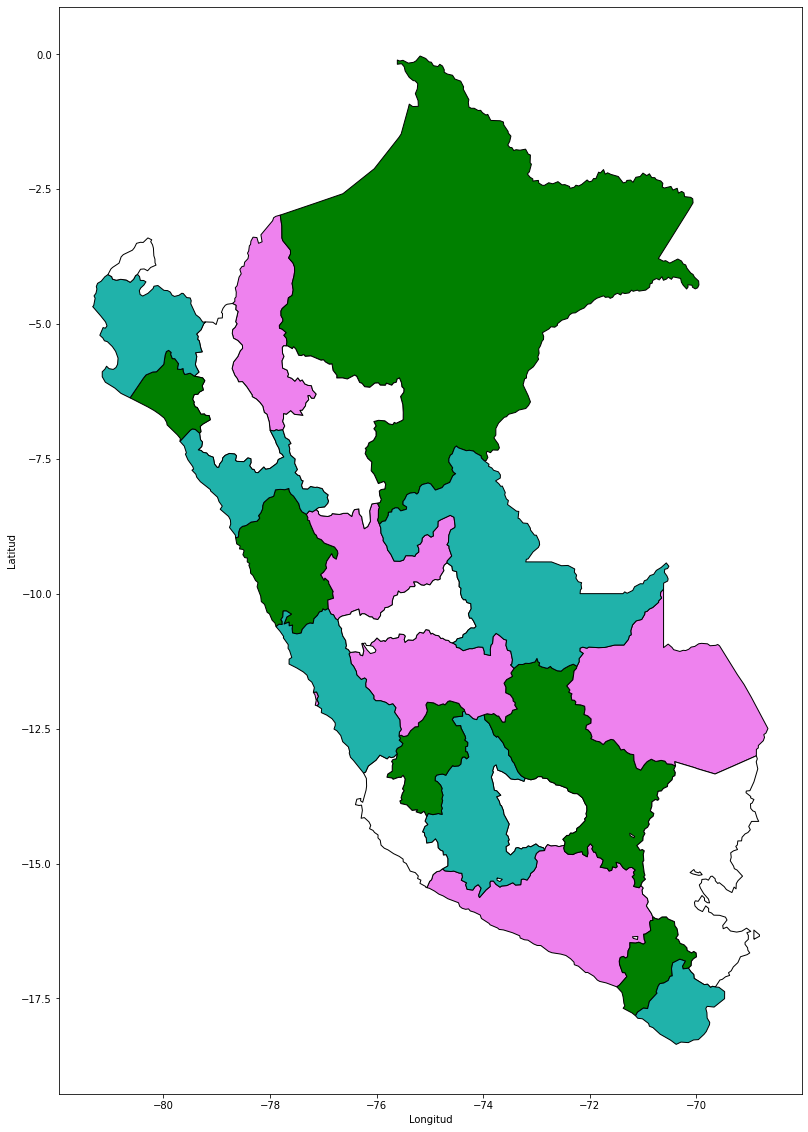

In [ ]:
#imprimir cantidad de colores
print('Hay',len(c),'regiones con colores:',c)
print('Hay',len(set(c)),'colores únicos:',set(c))
#plotear
colors_regiones = ['','cyan','green','yellow','black',
                   'blue','gold','lightgray','red',
                   'pink','darkorange','violet','white',
                   'royalblue','maroon','lightseagreen',
                   'royalblue','violet','lightseagreen',
                   'royalblue','white','lightseagreen']

cmap = ListedColormap([colors_regiones[c[i]] for i in range(25)],name='regions')
region_geojson.plot(figsize=(20,20),edgecolor='black',cmap=cmap)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()